<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/students_grades_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('/content/Student_Grades.csv')
df.head()

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade
0,2.5,0.5,0.0,2,2.3,21,C
1,5.1,1.5,0.5,4,4.9,47,B
2,3.2,1.0,0.5,3,2.9,27,C
3,8.5,3.7,1.2,7,7.7,75,A
4,3.5,1.2,0.3,3,3.2,30,C


In [4]:
y=df['Scores']
x=df.drop(['Grade','Scores'], axis=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Practice,25.0,2.760,1.722885,0.2,1.5,2.5,3.7,6.2
TeamWork,25.0,1.812,1.697871,0.0,0.5,1.2,3.0,6.0
MidTerm,25.0,4.920,2.325941,2.0,3.0,4.0,7.0,9.0
FinalExam,25.0,5.348,2.528689,1.9,3.2,4.9,7.7,9.7
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<Axes: xlabel='FinalExam'>

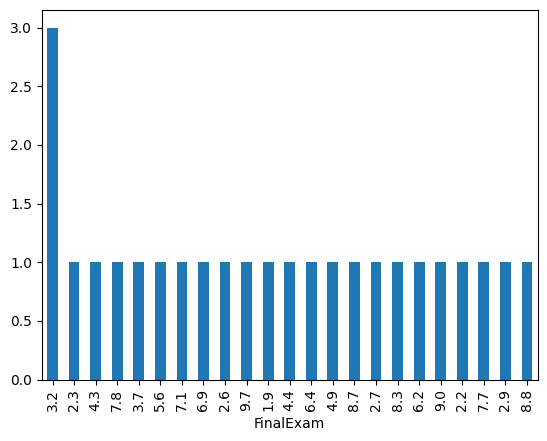

In [7]:
df["FinalExam"].value_counts().plot.bar()

<Axes: xlabel='Scores'>

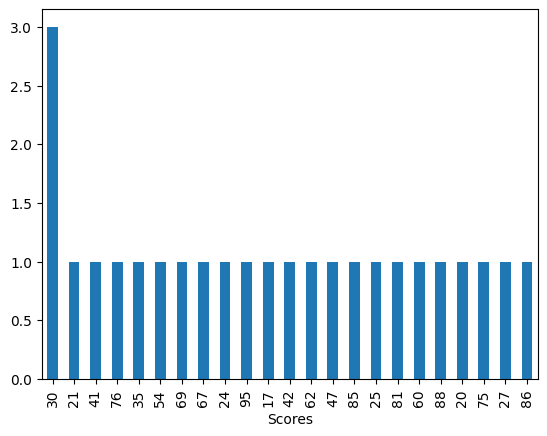

In [34]:
df["Scores"].value_counts().plot.bar()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model=LinearRegression()
model.fit(x_train, y_train)
Lr_score=model.score(x_test, y_test)
Lrpred=model.predict(np.array([["2.0","0.5","1.0","2","4.8"]]).astype(np.float64))
print(Lrpred)

[46.]


In [47]:
model=RandomForestRegressor()
model.fit(x_train, y_train)
Rf_score=model.score(x_test, y_test)
RFPred=model.predict(np.array([["2.0","0.5","1.0","2","4.8"]]).astype(np.float64))
print(RFPred)

[34.19]


In [46]:
model=GradientBoostingRegressor()
model.fit(x_train, y_train)
GB_score=model.score(x_test, y_test)
GBpred=model.predict(np.array([["2.0","0.5","1.0","2","4.8"]]).astype(np.float64))
print(GBpred)

[41.01548222]


In [21]:
df.head(1)

,Hours,Practice,TeamWork,MidTerm,FinalExam,Scores,Grade
0,2.5,0.5,0.0,2,2.3,21,C


In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
KNN_score=knn.score(x_test, y_test)

In [33]:
knnpred=knn.predict(np.array([["2.0","0.5","1.0","2","4.8"]]).astype(np.float64))
print(knnpred)

[25.2]


In [37]:
model=Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2888.1497
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2921.2749 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2986.9878 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2828.2932 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2915.3235 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2763.9446
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2895.6023 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2362.0010
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2458.0625 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2496.6240 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2483.0747 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2208.9529 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1952.8177 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2419.3474 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 

In [38]:
model.fit(x_train, y_train, epochs=25, batch_size=10)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1551 
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7049 
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6882
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0483 
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9498
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.6554
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5041
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7670 
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7049 
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.5157
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9046 
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0992 
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7792 
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4170 
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6981 
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━━

In [52]:
Keraspred=model.predict(np.array([["2.0","0.5","1.0","2","4.8"]]).astype(np.float64))
print(Keraspred)

[46.]


In [54]:
print("lrscore",Lr_score)
print("rfscore",Rf_score)
print("gbscore", GB_score)
print("knnscore",KNN_score)

lrscore 1.0
rfscore 0.9927563222297757
gbscore 0.9865454045476804
knnscore 0.9861590754588715


In [55]:
print("lrpred",Lrpred)
print("rfpred",RFPred)
print("gbpred",GBpred)
print("knnpred",knnpred)
print("keraspred",Keraspred)

lrpred [46.]
rfpred [34.19]
gbpred [41.01548222]
knnpred [25.2]
keraspred [46.]
